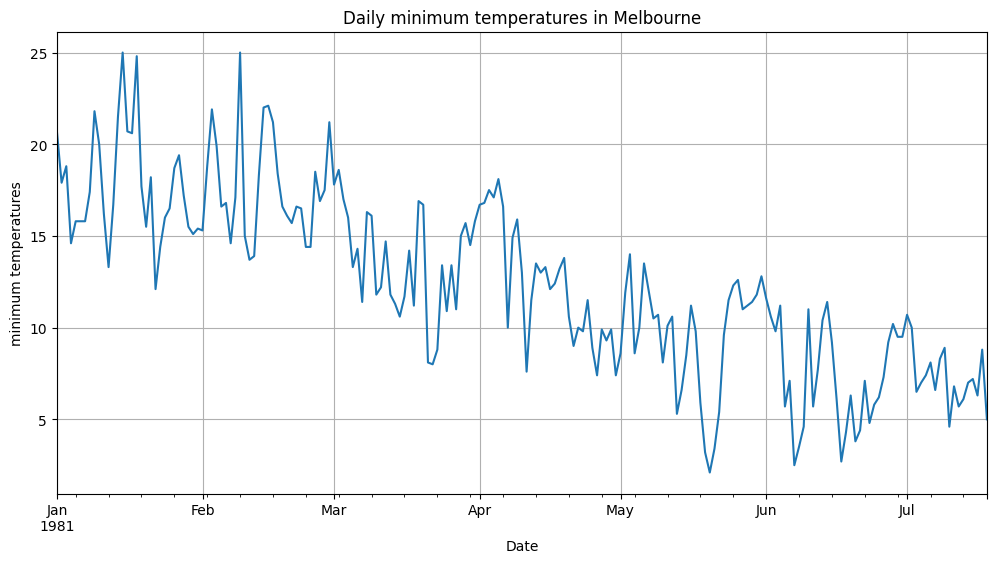

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Ganti dengan nama file dataset Anda
df = pd.read_csv("daily-minimum-temperatures-in-me.csv")

# Konversi kolom tanggal menjadi tipe datetime dan set sebagai index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Membuat plot garis dari kolom target
plt.figure(figsize=(12, 6))
df['minimum temperatures'].plot()
plt.title('Daily minimum temperatures in Melbourne')
plt.xlabel('Date')
plt.ylabel('minimum temperatures')
plt.grid(True)
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# baca dataset
df = pd.read_csv('daily-minimum-temperatures-in-me.csv')

# ubah kolom Date jadi tipe datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Temp': 'minimum_temperature'})  # sesuaikan nama kolom

# tampilkan 5 data pertama
print(df.head())



        Date  minimum_temperatures
0 1981-01-01                  20.7
1 1981-01-02                  17.9
2 1981-01-03                  18.8
3 1981-01-04                  14.6
4 1981-01-05                  15.8


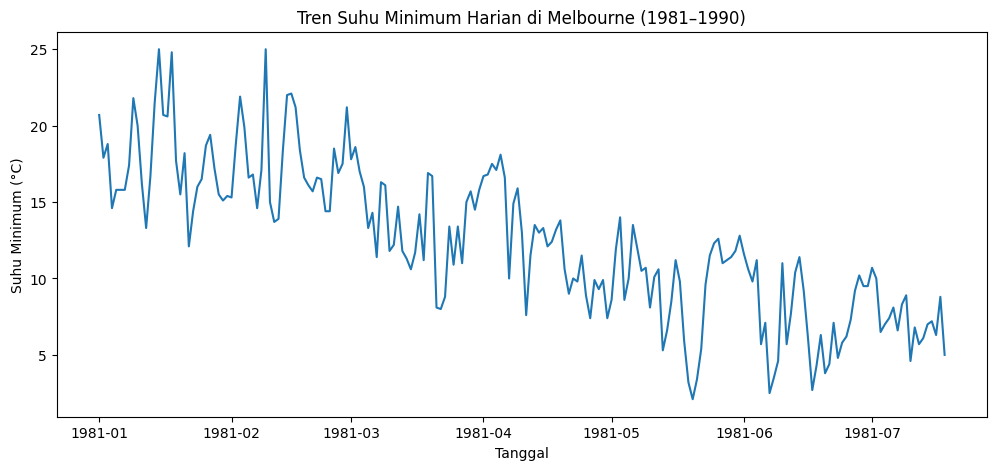

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['minimum_temperatures'])
plt.title('Tren Suhu Minimum Harian di Melbourne (1981–1990)')
plt.xlabel('Tanggal')
plt.ylabel('Suhu Minimum (°C)')
plt.show()


In [16]:
# cek missing value
print(df.isnull().sum())

# jika ada data kosong, bisa diisi dengan metode interpolasi
df['minimum_temperatures'] = df['minimum_temperatures'].interpolate()


Date                    0
minimum_temperatures    0
dtype: int64


In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['minimum_temperatures']])

# ubah ke DataFrame kembali agar mudah dibaca
scaled_df = pd.DataFrame(scaled_data, columns=['Scaled_Temperature'])
scaled_df.head()


,Scaled_Temperature
0,0.812227
1,0.689956
2,0.729258
3,0.545852
4,0.598253


In [18]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_data, window_size)

print('Bentuk X:', X.shape)
print('Bentuk y:', y.shape)


Bentuk X: (169, 30, 1)
Bentuk y: (169, 1)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# ubah bentuk data agar sesuai dengan format LSTM: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# bagi data jadi data latih dan validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Bentuk X_train:", X_train.shape)
print("Bentuk X_val:", X_val.shape)


Bentuk X_train: (135, 30, 1)
Bentuk X_val: (34, 30, 1)


In [20]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))  # output layer

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 864ms/step - loss: 0.1954 - val_loss: 0.0089
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - loss: 0.0380 - val_loss: 0.0300
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - loss: 0.0363 - val_loss: 0.0103
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 0.0308 - val_loss: 0.0087
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 0.0316 - val_loss: 0.0104
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 0.0231 - val_loss: 0.0164
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 0.0251 - val_loss: 0.0170
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.0223 - val_loss: 0.0122
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - loss: 0.0215 - val_loss: 0.0112
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 0.0236 - val_loss: 0.0127
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - loss: 0.0232 - val_loss: 0.0133
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - loss: 0.0224 - val_l

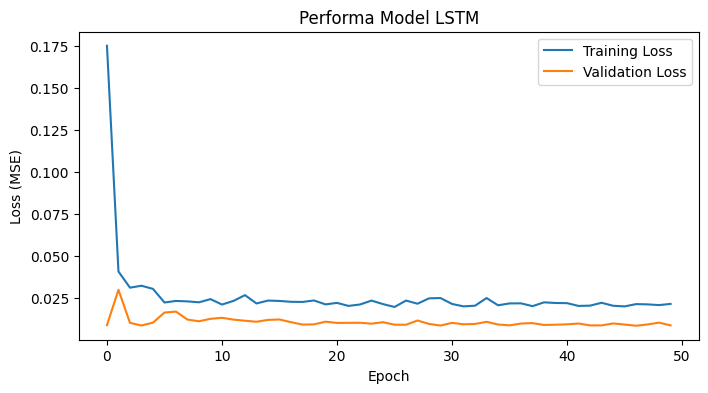

In [22]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Performa Model LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


In [23]:
# lakukan prediksi pada data validasi
y_pred = model.predict(X_val)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


In [24]:
# kembalikan ke skala asli
y_pred_inverse = scaler.inverse_transform(y_pred)
y_val_inverse = scaler.inverse_transform(y_val)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_val_inverse, y_pred_inverse))
mae = mean_absolute_error(y_val_inverse, y_pred_inverse)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 2.142182858507453
MAE: 1.7392337350284346


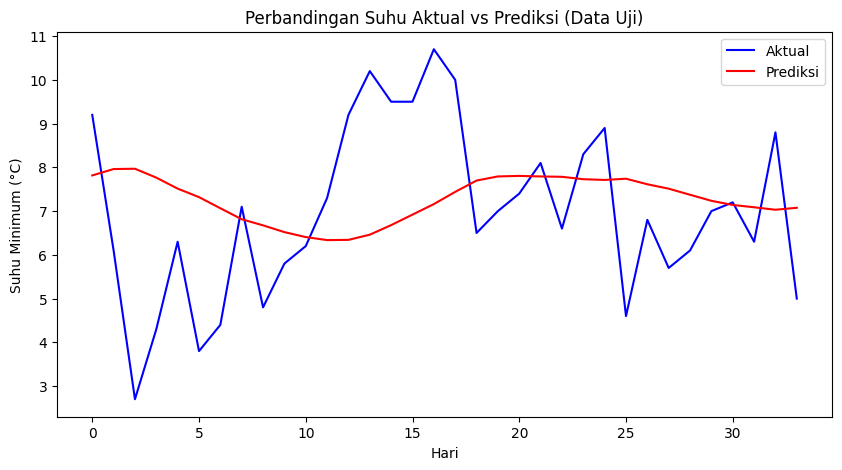

In [26]:
plt.figure(figsize=(10,5))
plt.plot(y_val_inverse, label='Aktual', color='blue')
plt.plot(y_pred_inverse, label='Prediksi', color='red')
plt.title('Perbandingan Suhu Aktual vs Prediksi (Data Uji)')
plt.xlabel('Hari')
plt.ylabel('Suhu Minimum (°C)')
plt.legend()
plt.show()


In [27]:
# simpan model
model.save('model_lstm_suhu.h5')

# simpan scaler
import joblib
joblib.dump(scaler, 'scaler_suhu.pkl')


['scaler_suhu.pkl']